# Price Analysis in Tri-City Restaurants

Below Notebook is an example analysis of gathered data of publicly available [*Wikipedia*](https://en.wikipedia.org/) and [*Inyourpocket*](https://www.inyourpocket.com) pages. In order to use the same data, please run web_scrap.ipynb Notebook.

Table of Contents:
1. Loading required libraries<br>
    1.1 Installing external packages<br>
    1.2 Importing the packages that will be used<br>
2. Loading Datasets<br>
    2.1 Loading Restaurants and Sightseeing  data<br>
        2.1.1 Data inspection<br>
        2.1.2 Data visualization<br>
    2.2 Loading a dataset of railway stations<br>
        2.2.1 Data inspection<br>
        2.2.2 Data visualization<br>
3. Visualization of all datasets<br>
4. Data estimation models (Machine learning)<br>
5. Generating additional data for further analysis<br>

I'm using '*!pip*' as I'm using the *Jupyter Notebook* in *Anaconda* environment.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install folium
# !pip install osmnx
# !pip install networkx
# !pip install scikit-learn
# !pip install seaborn

### 1.2 Importing the packages that will be used

In [2]:
# basic data handling
import re # string operations
import pandas as pd # structured data
# pd.set_option('display.precision', 2)
import numpy as np  # arithmetics operations
from math import nan # 

# visualization
import matplotlib.pyplot as plt # standard graphs
import folium # maps visualization
# from folium.plugins import FastMarkerCluster  # dynamic clustering

# graph handeling
import osmnx as ox # graph creation eg. from maps
import networkx as nx # graph optimization

# machine learning
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

## 2 Loading Datasets
### 2.1 Loading Restaurants and Sightseeing  data

In [3]:
files_paths = (
    #foods
    'inyourpocket_gdynia.csv',
    'inyourpocket_gdansk.csv',
    'inyourpocket_sopot.csv',
    #attractions
    'inyourpocket_gdynia_sightseeing.csv',
    'inyourpocket_gdansk_sightseeing.csv',
    'inyourpocket_sopot_sightseeing.csv',
)

df = pd.concat((pd.read_csv(f, index_col=None) for f in files_paths), ignore_index=True)

#### 2.1.1 Data inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dogs Allowed             137 non-null    object 
 1   Facilities for disabled  145 non-null    object 
 2   Child-friendly           172 non-null    object 
 3   longitude                475 non-null    float64
 4   latitude                 475 non-null    float64
 5   addressCountry           479 non-null    object 
 6   addressLocality          479 non-null    object 
 7   streetAddress            465 non-null    object 
 8   @type                    479 non-null    object 
 9   description              471 non-null    object 
 10  telephone                329 non-null    object 
 11  servesCuisine            247 non-null    object 
 12  openingHours             275 non-null    object 
 13  url                      479 non-null    object 
 14  name                     4

Since the parameters "*latitude*" and "*longitude*" will be used a lot, I created a variable "*coords*" to speed up the calling of these two parameters.

In [5]:
coords = ['latitude', 'longitude'] # the coordinates won't be changed, but Pandas need a list, so the coordinate type is a list

__Missing coordinates__ in __df__ are displayed to see what they look like, and if can they be restored. As the reader can see, the missing data can be found through the '*description*' of the parameters and can be checked a further under the matching URL.

In [6]:
df[df[coords[0]].isna()]

,Dogs Allowed,Facilities for disabled,Child-friendly,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,...,Wi-fi,Home Delivery,Smoking place,smokingAllowed,No Credit cards,Air-conditioning,Guarded parking,Conference facilities,Fireplace,City card
71,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,Restaurant,Belgian fries are the order of the day here – ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,Restaurant,We’re not absolutely certain but we think thes...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Tours of Gdańsk and beyond with licensed guide...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Get the most out of visits to the European Sol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df[coords[1]].isna()]

,Dogs Allowed,Facilities for disabled,Child-friendly,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,...,Wi-fi,Home Delivery,Smoking place,smokingAllowed,No Credit cards,Air-conditioning,Guarded parking,Conference facilities,Fireplace,City card
71,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,Restaurant,Belgian fries are the order of the day here – ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,Restaurant,We’re not absolutely certain but we think thes...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Tours of Gdańsk and beyond with licensed guide...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Get the most out of visits to the European Sol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(subset=coords, inplace=True)

__Duplicated rows__ in __df__ are displayed to see what they look like. Duplicated rows can mean that during web scraping certain URL was listed twice or same URLs were omitted.

In [9]:
df[df.duplicated(keep='last')]

,Dogs Allowed,Facilities for disabled,Child-friendly,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,...,Wi-fi,Home Delivery,Smoking place,smokingAllowed,No Credit cards,Air-conditioning,Guarded parking,Conference facilities,Fireplace,City card
82,NaN,True,True,18.561707,54.409325,PL,Gdańsk,"ul. Opata Jacka Rybińskiego 18, Gdańsk",Restaurant,A popular American-themed diner right opposite...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,True,NaN,NaN,18.657904,54.352701,PL,Gdańsk,"ul. Targ Rybny 11, Gdańsk",Restaurant,"Dominated by an impressive floating sushi bar,...",...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,True,NaN,True,18.659275,54.353733,PL,Gdańsk,"ul. Wartka 5, Gdańsk",Restaurant,The oldest remaining restaurant in town dates ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,True,NaN,NaN,18.657987,54.352658,PL,Gdańsk,"ul. Targ Rybny 11, Gdańsk",Restaurant,An extremely good Thai restaurant which boasts...,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,True,True,18.658304,54.353682,PL,Gdańsk,"ul. Targ Rybny 1, Gdańsk",Restaurant,In a word – excellent. The Mercato is the in-h...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,True,True,True,18.567050,54.409081,PL,Gdańsk,"ul. Kaprów 19D, Gdańsk",Restaurant,If this wasn’t stuck out in the Oliwa district...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,18.555962,54.409455,PL,Gdańsk,"ul. Cystersów 11, Gdańsk",Restaurant,An encyclopaedic list of Italian classics cook...,...,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,True,18.657366,54.353014,PL,Gdańsk,ul. Targ Rybny 6C,Restaurant,"Without a doubt, one of the best restaurants i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop_duplicates(keep='last', inplace=True)

Since '__priceRange__' is of type Object, I have converted it to minimal and maximal price in floating type columns.

In [11]:
df["priceRange"].dropna()

5                   (26-119zł)
11                   (15-20zł)
13                   (35-72zł)
17                   (21-50zł)
18                   (16-32zł)
19                   (12-40zł)
20                   (17-50zł)
22                   (23-65zł)
23                   (23-55zł)
25                   (25-60zł)
27                   (15-19zł)
30                   (10-29zł)
31                    (9-18zł)
35                   (12-20zł)
39                   (15-46zł)
40                    (9-13zł)
42                   (21-75zł)
44                   (15-60zł)
45                    (8-18zł)
46                   (24-48zł)
81                    (6-14zł)
84                  (30-399zł)
103                  (26-88zł)
106    All breakfasts 30-32zł.
111                  (17-70zł)
126                   (7-26zł)
134                  (16-23zł)
137                    28-39zł
142                   (9-17zł)
150                  (14-42zł)
163                  (22-41zł)
191                  (26-88zł)
212     

In [12]:
def get_price(priceRange, option:str='min'):
    """
    get_price function extracts the first or second value from a string that contains only two integer values
    
    :param priceRange: str; string with placed integer values
    :param option: str; {'min', 'max'}
    
    :return: integer value
    """
    if isinstance(priceRange, str):
        _x = re.findall('\d+',priceRange)
        if option == 'min':
            return int(_x[0])
        else:
            return int(_x[1])
            
        return _x
    return priceRange

df['price_min'] = df.apply(lambda x: get_price(x['priceRange'], option='min'), axis=1)
df['price_max'] = df.apply(lambda x: get_price(x['priceRange'], option='max'), axis=1)

df.describe()

,longitude,latitude,price_min,price_max
count,467.000000,467.000000,44.000000,44.000000
mean,18.609409,54.403169,17.454545,49.613636
std,0.078888,0.063266,7.202889,59.001071
min,18.171211,54.084876,6.000000,13.000000
25%,18.562500,54.350556,11.500000,20.000000
50%,18.612747,54.380770,16.000000,39.500000
75%,18.653094,54.444133,23.250000,56.250000
max,19.683307,54.584935,35.000000,399.000000


In [13]:
df.groupby('servesCuisine').sum().describe()

,longitude,latitude,price_min,price_max
count,42.000000,42.000000,42.000000,42.000000
mean,104.963523,307.024869,18.285714,51.976190
std,159.004129,464.850085,25.713511,100.413411
min,18.484850,54.347490,0.000000,0.000000
25%,37.095616,108.754615,0.000000,0.000000
50%,65.078030,190.445276,7.000000,9.500000
75%,111.796914,326.672508,25.500000,58.250000
max,1023.508874,2992.010589,101.000000,575.000000


In [14]:
benefits = list()
for column in df.columns:
    if sum(df.dropna(subset=column)[column] == True):
        print(column)
        benefits.append(column)

Dogs Allowed
Facilities for disabled
Child-friendly
Outside seating
Live Music
Takeaway
Credit Cards
Wi-fi
Home Delivery
Smoking place
smokingAllowed
No Credit cards
Air-conditioning
Guarded parking
Conference facilities
Fireplace
City card


In [15]:
df.groupby(benefits[4]).sum().describe()

,longitude,latitude,price_min,price_max
count,1.000000,1.000000,1.0,1.0
mean,614.363458,1794.753757,37.0,107.0
std,NaN,NaN,NaN,NaN
min,614.363458,1794.753757,37.0,107.0
25%,614.363458,1794.753757,37.0,107.0
50%,614.363458,1794.753757,37.0,107.0
75%,614.363458,1794.753757,37.0,107.0
max,614.363458,1794.753757,37.0,107.0


#### 2.2.1 Data visualizations

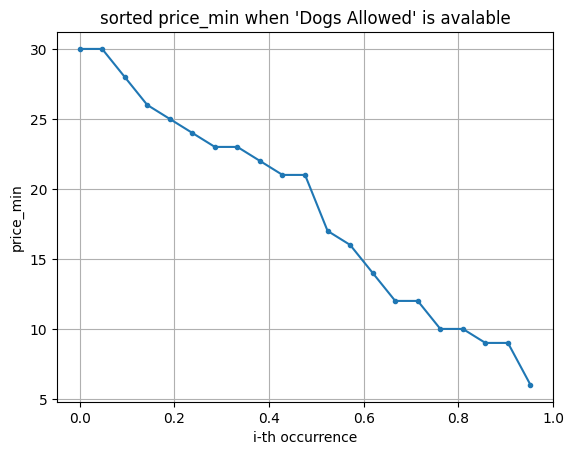

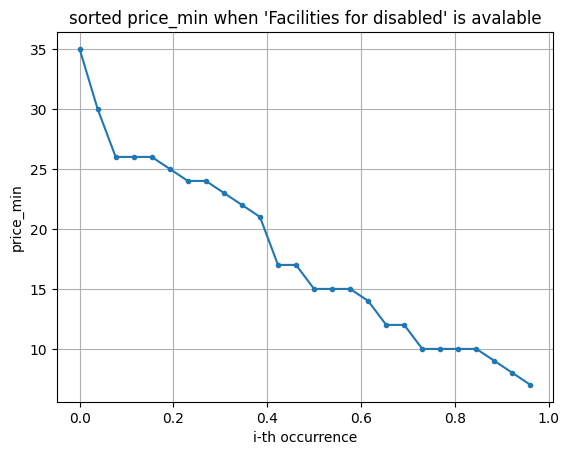

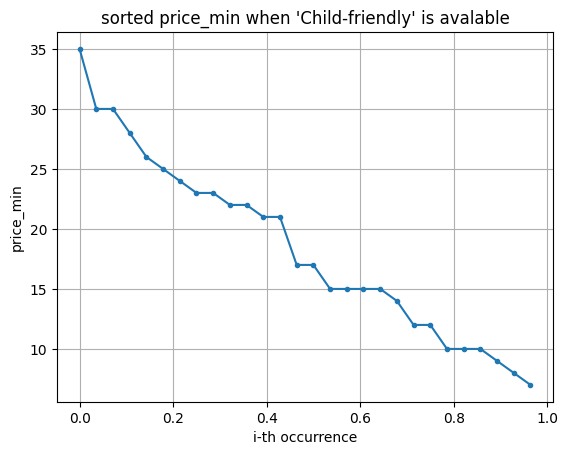

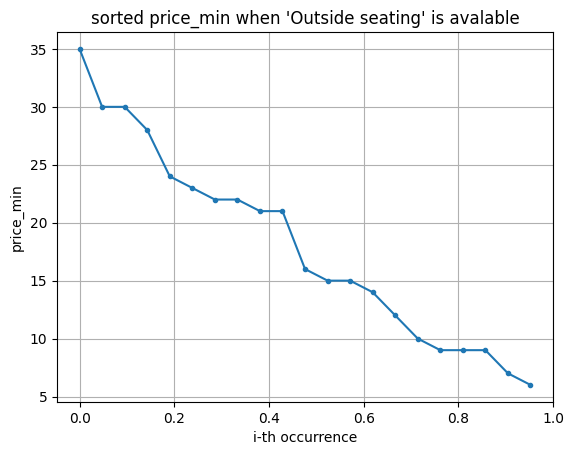

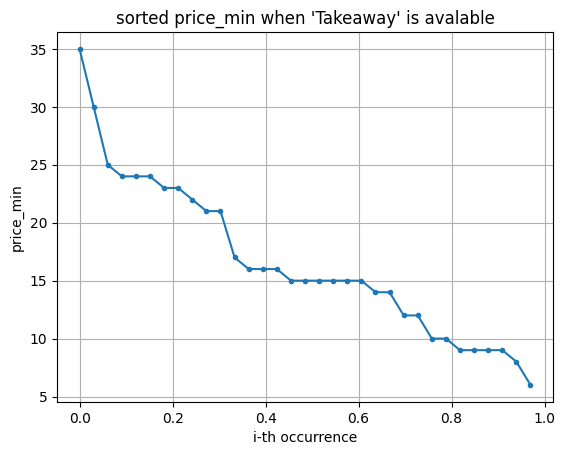

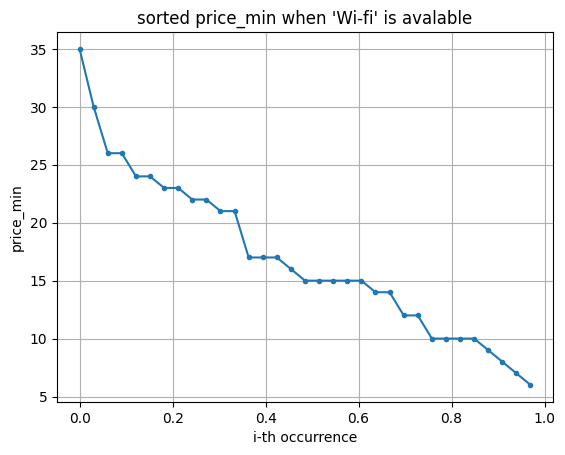

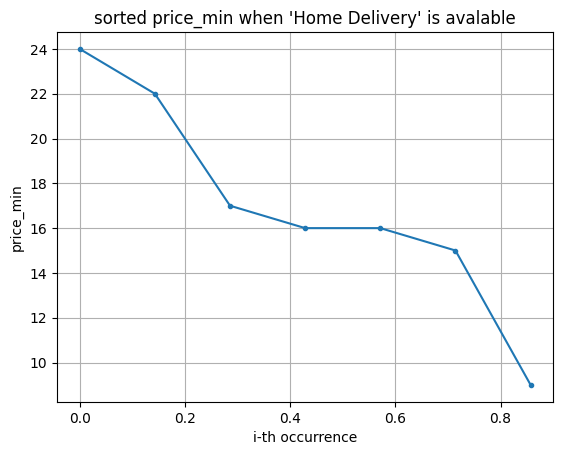

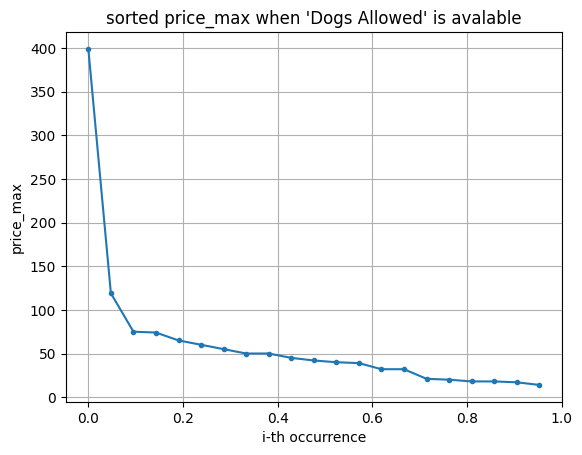

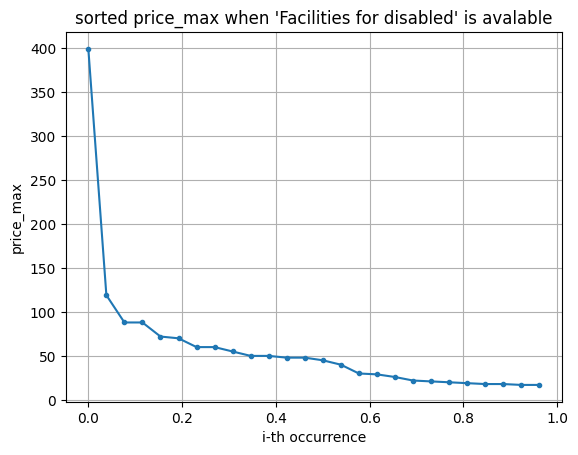

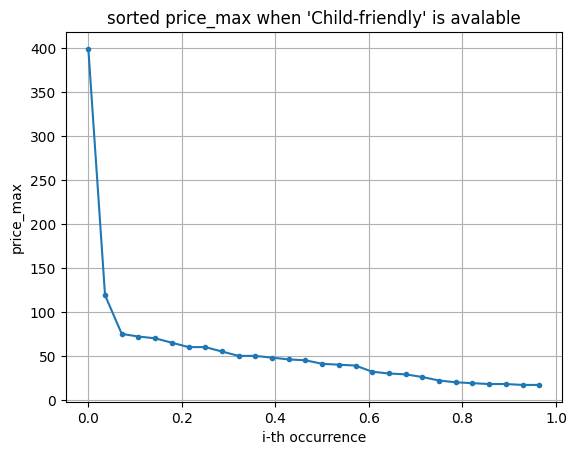

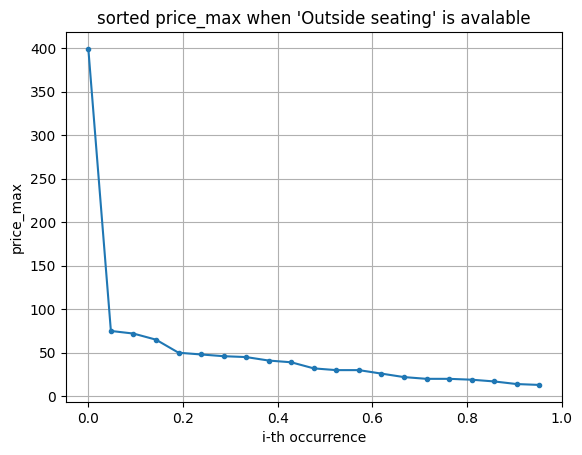

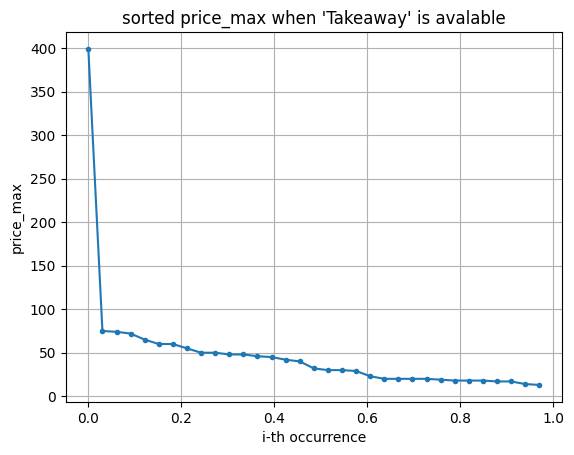

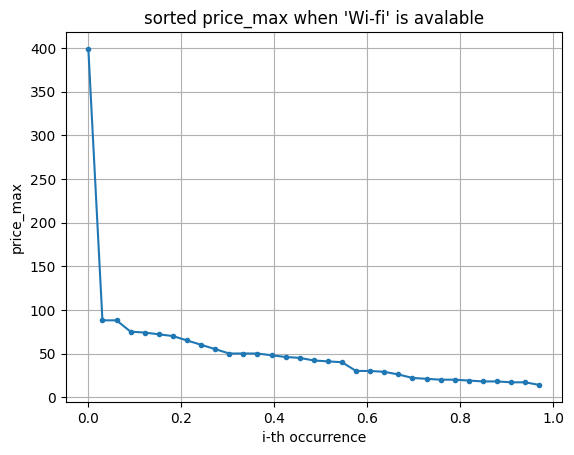

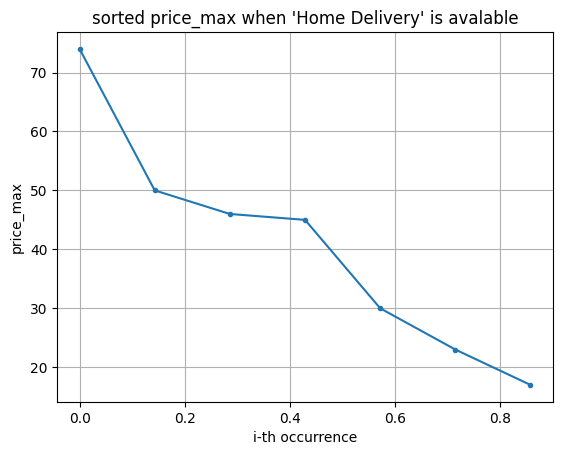

In [16]:
for y_axis in 'price_min', 'price_max':
    for benefit in benefits:
        x = df[y_axis][df[benefit].fillna(False)].dropna().tolist()
        if len(x)>5:
            x.sort(reverse=True)
            plt.plot(np.arange(0,1,1./len(x)),x, '.-')
            plt.title("sorted {} when '{}' is avalable".format(y_axis, benefit))
            plt.ylabel(y_axis)
            plt.xlabel("i-th occurrence")
            plt.grid(True)
            plt.show()

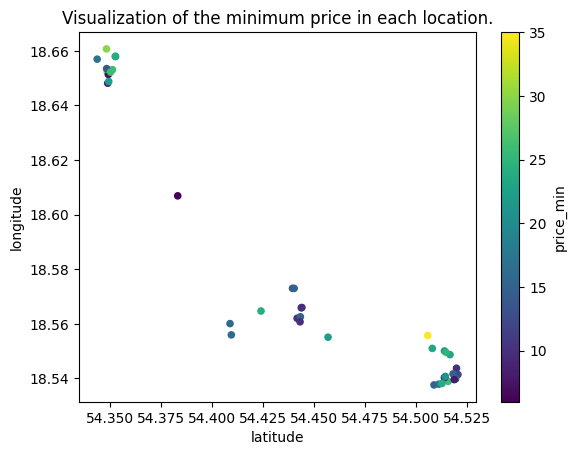

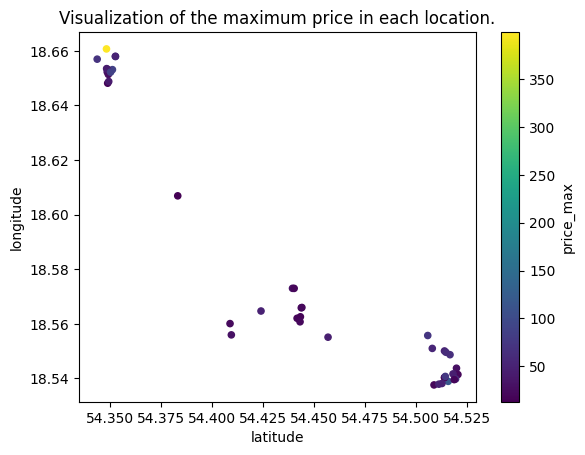

In [17]:
df.dropna(subset='price_min').plot.scatter(x=coords[0], y=coords[1], c='price_min')
plt.title("Visualization of the minimum price in each location.")
plt.show()

df.dropna(subset='price_max').plot.scatter(x=coords[0], y=coords[1], c='price_max')
plt.title("Visualization of the maximum price in each location.")
plt.show()


### 2.2 Loading a dataset of railway stations

In [18]:
df_railway_stations = pd.read_csv('tricity_stations_coordinates.csv')

df_railway_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       20 non-null     object 
 1   latitude   20 non-null     float64
 2   longitude  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


#### 2.2.1 Data inspection

In [19]:
df_railway_stations.describe()

,latitude,longitude
count,20.000000,20.000000
mean,54.456117,18.553133
std,0.067107,0.055099
min,54.357222,18.446389
25%,54.397569,18.526944
50%,54.449306,18.557794
75%,54.522159,18.580625
max,54.549759,18.644444


### 3 Visualization of all datasets

In [20]:
# centerpoint of map at avr of df (latitude, longitude)
flMap = folium.Map(
    location=df[coords].mean(axis=0),
    zoom_start=10.2
)

for _, row in df.iterrows():
    folium.Marker(
        location=[row[coords[0]], row[coords[1]]],
        popup="Type: {}\nName: {}".format(row['@type'], row['name']),
        icon=folium.map.Icon(color="lightred")
    ).add_to(flMap)

for _, row in df_railway_stations.iterrows():
    folium.Marker(
        location=[row[coords[0]], row[coords[1]]],
        popup=row['name'],
        icon=folium.map.Icon(color="black",icon='road',prefix='fa')
    ).add_to(flMap)

# rendering map
flMap

## Machine learning

Predictive models will be fitted separately to multiple datasets, so I'm writing functions below to optimize that process. 

Since I'm working with a small dataset, I use GridSearchCV which is used to check all supplied model parameters - this method is not recommended on larger datasets but is acceptable and fast here

In [21]:
def get_linear_regressor_model(
    dataFrame,
    x_column:str, y_column:str, z_column:str,
    cv=5, # 
    log=True,
):
        """
        get_linear_regressor_model function that fits a linear regression model to pandas.Dataframe column data

        :param dataFrame: pandas.dataFrame containing the columns that will be fitted/predicted to/from the estimated model
        :param x_column: str; independent variables (pandas.dataFrame column name)
        :param y_column: str; independent variables (pandas.dataFrame column name)
        :param z_column: str; dependent variables (pandas.dataFrame column name)
        :param cv: cross-validation splitting strategy
        :param log: bool; if True, the error log is returned at the end of the scrap_inyourpocket function

        :return: linear regression model and a log with messages generated when the function runs
        """
        # input (x_column, y_column)
        x = dataFrame[[x_column, y_column]].values
        
        # output (z_column)
        y = dataFrame[z_column].values
        
        # pipeline of the learning model
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ])

        model.fit(x, y)
        
        # cross-validation
        cv_scores = cross_val_score(model, x, y, cv=cv, scoring='neg_root_mean_squared_error')
        cv_mse = -np.mean(cv_scores)
        
        if log == True:
            log = ["root mean squared error is equal to {:.2f} PLN".format(cv_mse)]
        
        return model, log

In [22]:
def get_regressor_model(
    dataFrame,
    x_column:str, y_column:str, z_column:str, # used pandas.dataFrame columns
    param_grid:dict=None,
    num_splits=3, # number of KFold splits
    log=True,
    scoring='neg_root_mean_squared_error',
    regressor='GradientBoostingRegressor'
):
        """
        get_regressor_model function that fits a regression model to pandas.Dataframe column data

        :param dataFrame: pandas.dataFrame containing the columns that will be fitted/predicted to/from the estimated model
        :param x_column: str; independent variables (pandas.dataFrame column name)
        :param y_column: str; independent variables (pandas.dataFrame column name)
        :param z_column: str; dependent variables (pandas.dataFrame column name)
        :param param_grid: dict; parameter settings to try as values of the model
        :param num_splits: int; number of KFold splits
        :param log: bool; if True, the error log is returned at the end of the scrap_inyourpocket function
        :param scoring: str; Strategy to evaluate the performance of the scikit-learn cross-validated model
        :param regressor: str; type of used regressor {GradientBoostingRegressor, RandomForestRegressor}

        :return: regression model and a log with messages generated when the function runs
        """
        if param_grid is None:
            param_grid = {
                'regressor__n_estimators': [100, 200, 300],
                'regressor__max_depth': [2, 3, 5]
            }
        if log == True:
            log = list()
            
        if regressor == 'GradientBoostingRegressor':
            regressor = GradientBoostingRegressor()
        elif regressor == 'RandomForestRegressor':
            regressor = RandomForestRegressor()
        
        # input data
        x = dataFrame[[x_column, y_column]].values
        # output data
        y = dataFrame[z_column].values
        
        
        # pipeline of the learning model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', regressor)
        ])
        
        # initialize cross-validation
        kf = KFold(n_splits=num_splits, shuffle=True, random_state=21)
        
        # Perform grid search with cross-validation
        searchCV_grid = GridSearchCV(pipeline, param_grid, cv=kf, scoring=scoring)
        searchCV_grid.fit(x, y)
        
        best_model = searchCV_grid.best_estimator_
        
        log.extend(["best parameters are "+str(searchCV_grid.best_params_),
                    "root mean squared error is equal to {:.2f} PLN".format(-searchCV_grid.best_score_),
                    "no parameters : "+str(best_model.get_params()['regressor'].n_estimators)
                   ])
        
        
        return best_model, log

In [23]:
def predict_values(model, x, y=nan, ignore_y_nan_values=True):
        """
        predict_values the function returns the value predicted by the given scikit-learn model if that value has not already been provided

        :param model: scikit-learn model
        :param x: list or int (the type of x depends on the provided model); independent variables
        :param y: str; dependent variable
        :param ignore_y_nan_values: bool; 

        :return: value predicted by the given scikit-learn model if that value has not already been provided
        """
        if ignore_y_nan_values == True:
            if y == nan:
                return y

        return model.predict(x)[0]

First, I predict directly 'price_min'/'price_max' from 'latitude', 'longitude'

Estimating Linear Regression model:

In [24]:
# trying to predict minimum prices
price_min_linear_Model, log = get_linear_regressor_model(
    df.dropna(subset='price_min'),
    x_column=coords[0], y_column=coords[1],
    z_column='price_min',
)
print('price_min', *log, sep='\n', end='\n\n')

# trying to predict maximum prices
price_max_linear_Model, log = get_linear_regressor_model(
    df.dropna(subset='price_max'),
    x_column=coords[0], y_column=coords[1],
    z_column='price_max',
)
print('price_max', *log, sep='\n')

price_min
root mean squared error is equal to 7.64 PLN

price_max
root mean squared error is equal to 51.02 PLN


Estimating RandomForestRegressor model:

In [25]:
param_grid = {
    'regressor__n_estimators': [10, 20, 30],
    'regressor__max_depth': [2, 3, 4],
}

# trying to predict minimum prices
price_min_randomForest_Model, log = get_regressor_model(
    df.dropna(subset='price_min'),
    x_column=coords[0], y_column=coords[1],
    z_column='price_min',
    param_grid=param_grid,
    regressor='RandomForestRegressor'
)
print('price_min', *log, sep='\n', end='\n\n')

# trying to predict maximum prices
price_max_randomForest_Model, log = get_regressor_model(
    df.dropna(subset='price_max'),
    x_column=coords[0], y_column=coords[1],
    z_column='price_max',
    param_grid=param_grid,
    regressor='RandomForestRegressor'
)
print('price_max', *log, sep='\n')

price_min
best parameters are {'regressor__max_depth': 2, 'regressor__n_estimators': 30}
root mean squared error is equal to 6.33 PLN
no parameters : 30

price_max
best parameters are {'regressor__max_depth': 3, 'regressor__n_estimators': 10}
root mean squared error is equal to 43.88 PLN
no parameters : 10


Estimating GradientBoostingRegressor model:

In [26]:
param_grid = {
    'regressor__n_estimators': [10, 20, 30],
    'regressor__max_depth': [2, 3, 4]
}

# trying to predict minimum prices
price_min_GBR_Model, log = get_regressor_model(
    df.dropna(subset='price_min'),
    x_column=coords[0], y_column=coords[1],
    z_column='price_min',
    param_grid=param_grid
)
print('price_min', *log, sep='\n', end='\n\n')

# trying to predict maximum prices
price_min_GBR_Model, log = get_regressor_model(
    df.dropna(subset='price_max'),
    x_column=coords[0], y_column=coords[1],
    z_column='price_max',
    param_grid=param_grid
)
print('price_max', *log, sep='\n')

price_min
best parameters are {'regressor__max_depth': 4, 'regressor__n_estimators': 10}
root mean squared error is equal to 6.52 PLN
no parameters : 10

price_max
best parameters are {'regressor__max_depth': 3, 'regressor__n_estimators': 20}
root mean squared error is equal to 43.73 PLN
no parameters : 20


Applayng best models to *df*:

In [27]:
df['predicted min price'] = df.apply(lambda x: predict_values(
    model=price_min_linear_Model,
    x=[x[coords]],
    y=x['price_min']),
    axis=1)

df['predicted max price'] = df.apply(lambda x: predict_values(
    model=price_min_GBR_Model,
    x=[x[coords]],
    y=x['price_max']),
    axis=1)

Inspection of the generated data:

In [28]:
df.describe()

,longitude,latitude,price_min,price_max,predicted min price,predicted max price
count,467.000000,467.000000,44.000000,44.000000,467.000000,467.000000
mean,18.609409,54.403169,17.454545,49.613636,18.360213,58.576603
std,0.078888,0.063266,7.202889,59.001071,9.116295,76.652675
min,18.171211,54.084876,6.000000,13.000000,-32.737013,27.845943
25%,18.562500,54.350556,11.500000,20.000000,15.861834,30.829700
50%,18.612747,54.380770,16.000000,39.500000,18.317722,32.915015
75%,18.653094,54.444133,23.250000,56.250000,20.681823,47.007963
max,19.683307,54.584935,35.000000,399.000000,167.322907,356.522775


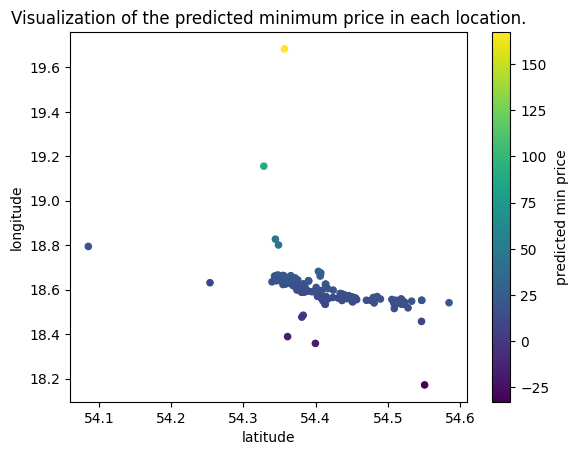

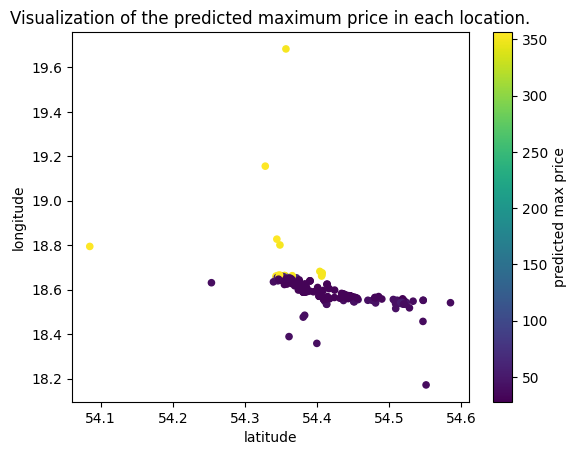

In [29]:
df.plot.scatter(x=coords[0], y=coords[1], c='predicted min price')
plt.title("Visualization of the predicted minimum price in each location.")
plt.show()

df.plot.scatter(x=coords[0], y=coords[1], c='predicted max price')
plt.title("Visualization of the predicted maximum price in each location.")
plt.show()

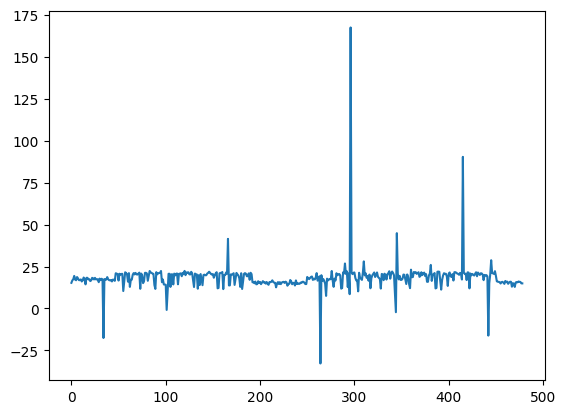

In [30]:
df['predicted min price'].plot()
plt.show()

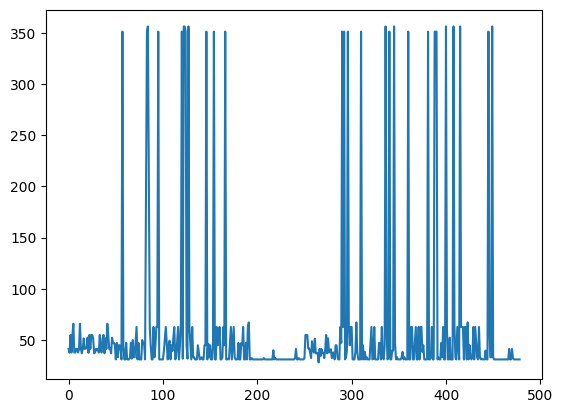

In [31]:
df['predicted max price'].plot()
plt.show()

Minimizing standard deviation in clusters

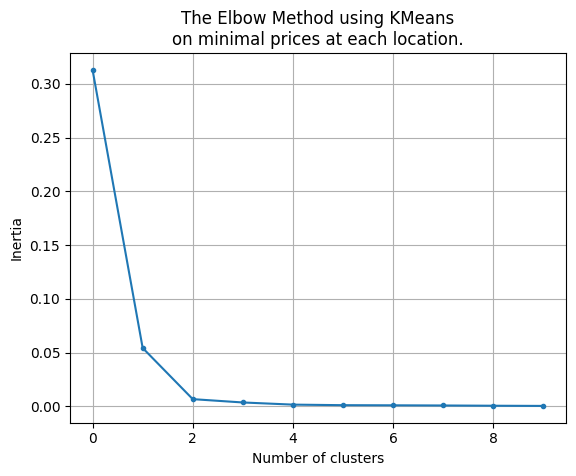

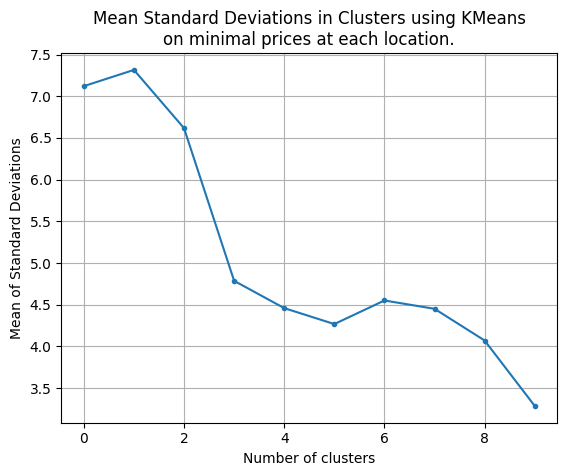

In [32]:
x, y = df.dropna(subset='price_min')[coords], df.dropna(subset='price_min')['price_min']

# clustering using KMeans
max_clusters = 10

inertia, mean_std = [], []
for k in range(max_clusters):
    model = sklearn.cluster.KMeans(n_clusters=k+1,random_state=21,n_init='auto').fit(x)
    inertia.append(model.inertia_)
    mean_std.append(np.nanmean([
        np.std(y[model.labels_ == i]) for i in range(max_clusters)
    ]))
    

# ploting
plt.title('The Elbow Method using KMeans\non minimal prices at each location.')
plt.plot(np.arange(max_clusters), inertia, '.-')
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.show()

plt.title('Mean Standard Deviations in Clusters using KMeans\non minimal prices at each location.')
plt.plot(np.arange(max_clusters), mean_std, '.-')
plt.ylabel("Mean of Standard Deviations")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.show()


 2 : clusters
  no cluster : 0
 mean : 17.55
  min : 8.0
  max : 35.0
  std : 6.859118019104206
  no cluster : 1
 mean : 19.692307692307693
  min : 6.0
  max : 30.0
  std : 8.2962884693617

 4 : clusters
  no cluster : 0
 mean : 17.55
  min : 8.0
  max : 35.0
  std : 6.859118019104206
  no cluster : 1
 mean : 20.833333333333332
  min : 7.0
  max : 30.0
  std : 7.592027982620249
  no cluster : 2
 mean : 13.125
  min : 9.0
  max : 22.0
  std : 4.075460096725276
  no cluster : 3
 mean : 6.0
  min : 6.0
  max : 6.0
  std : 0.0


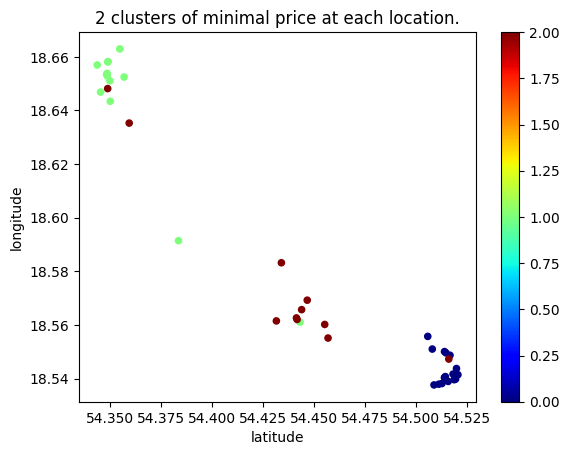

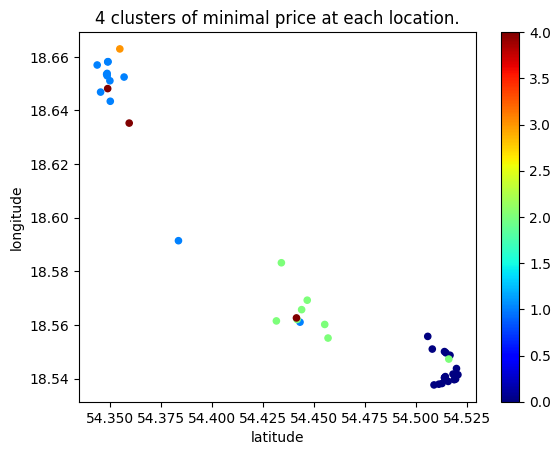

In [33]:
for k in (2, 4):
    model = sklearn.cluster.KMeans(n_clusters=k+1,random_state=21,n_init='auto').fit(x)

    df.iloc[x.index].plot.scatter(x=coords[0], y=coords[1], c=model.labels_,# label="no given price",
                    colormap='jet')
    plt.title("{} clusters of minimal price at each location.".format(k))
    
    print('\n',k, ": clusters")
    for i in range(k):
        _y = y[model.labels_ == i]
        print("  no cluster : {}\n mean : {}\n  min : {}\n  max : {}\n  std : {}".format(
            i,
            np.nanmean(_y),
            np.min(_y),
            np.max(_y),
            np.std(_y),
        ))

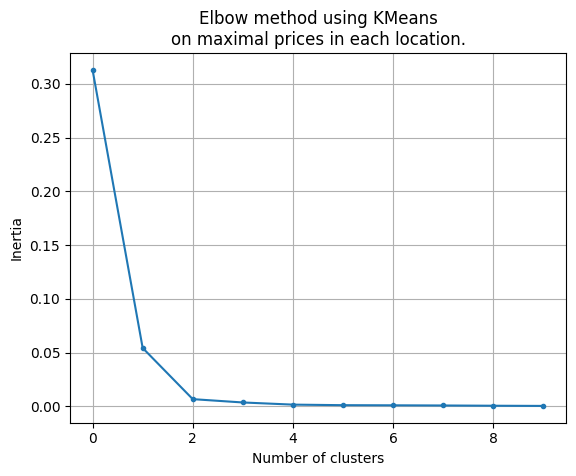

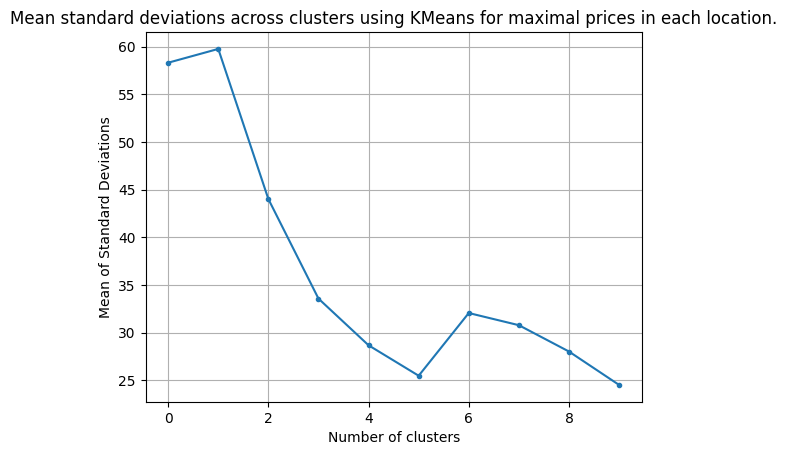

In [34]:
x, y = df.dropna(subset='price_max')[coords], df.dropna(subset='price_max')['price_max']

# clustering using KMeans
max_clusters = 10

inertia, mean_std = [], []
for k in range(max_clusters):
    model = sklearn.cluster.KMeans(n_clusters=k+1,random_state=21,n_init='auto').fit(x)
    inertia.append(model.inertia_)
    mean_std.append(np.nanmean([
        np.std(y[model.labels_ == i]) for i in range(max_clusters)
    ]))
    

# ploting
plt.title('Elbow method using KMeans\non maximal prices in each location.')
plt.plot(np.arange(max_clusters), inertia, '.-')
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.show()

plt.title('Mean standard deviations across clusters using KMeans for maximal prices in each location.')
plt.plot(np.arange(max_clusters), mean_std, '.-')
plt.ylabel("Mean of Standard Deviations")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.show()


 2 : clusters
  no cluster : 0
 mean : 45.45
  min : 13.0
  max : 119.0
  std : 25.464632335849657
  no cluster : 1
 mean : 75.38461538461539
  min : 14.0
  max : 399.0
  std : 96.41220674513916

 4 : clusters
  no cluster : 0
 mean : 45.45
  min : 13.0
  max : 119.0
  std : 25.464632335849657
  no cluster : 1
 mean : 80.5
  min : 17.0
  max : 399.0
  std : 98.63949513252793
  no cluster : 2
 mean : 24.125
  min : 17.0
  max : 45.0
  std : 8.709728755822422
  no cluster : 3
 mean : 14.0
  min : 14.0
  max : 14.0
  std : 0.0


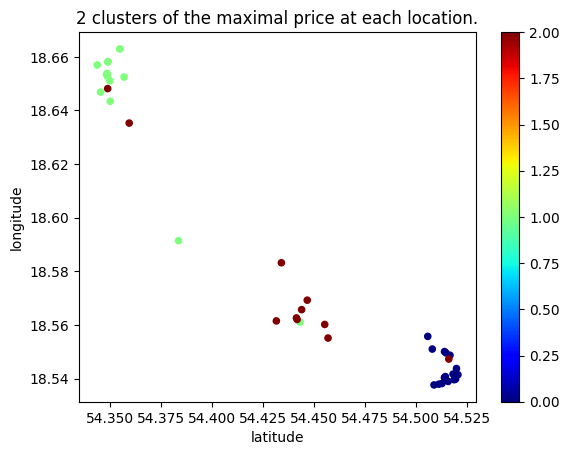

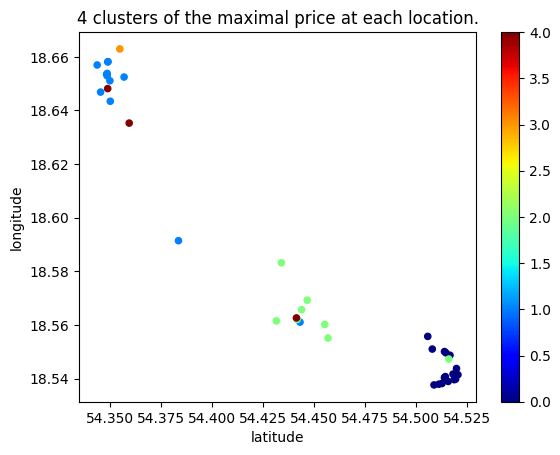

In [35]:
for k in (2, 4):
    model = sklearn.cluster.KMeans(n_clusters=k+1,random_state=21,n_init='auto').fit(x)

    df.iloc[x.index].plot.scatter(x=coords[0], y=coords[1], c=model.labels_,# label="no given price",
                    colormap='jet')
    plt.title("{} clusters of the maximal price at each location.".format(k))
    
    print('\n',k, ": clusters")
    for i in range(k):
        _y = y[model.labels_ == i]
        print("  no cluster : {}\n mean : {}\n  min : {}\n  max : {}\n  std : {}".format(
            i,
            np.nanmean(_y),
            np.min(_y),
            np.max(_y),
            np.std(_y),
        ))

## 5. Generating additional data for further analysis

In [36]:
def findShortestPath(
    start_point:list=None, # (latitude, longitude)
    end_point:list=None, # (latitude, longitude)
    transportation:str='walk',
    metric:str='length',
    resolution=1000,
    method='dijkstra',
    plot_route=False
):
    center_point = 0.5*(start_point[0]+end_point[0]), 0.5*(start_point[1]+end_point[1])# (lat, lng)
    # creating graph:
    graph = ox.graph_from_point(
        center_point=center_point,
        dist=resolution, 
        network_type=transportation,
        simplify=True,
    )
    
    if metric == 'length':
        # in meters
        graph = ox.distance.add_edge_lengths(graph)
    elif metric == 'time':
        graph = ox.add_edge_travel_times(graph)
    else:
        raise ValueError("given metric is unrecogisable, please use one of:\n'length', 'time'")
    
    source = ox.distance.nearest_nodes(graph,
                                       Y=start_point[0], # latitude
                                       X=start_point[1], # longitude
                                      )
    target = ox.distance.nearest_nodes(graph,
                                       Y=end_point[0], # latitude
                                       X=end_point[1], # longitude
                                      )
    try:
#         ids' of each node in shortest path
        shortest_path = nx.shortest_path(graph,
                                             source=source,
                                             target=target,
                                             method=method,
                                             weight=metric
                                            )
            # shortest path length in meeters
        path_lenght = sum(graph.edges[(shortest_path[i], shortest_path[i+1], 0)]["length"] for i in range(len(shortest_path)-1))
        
        if plot_route is True:
            fig, ax = ox.plot_graph_route(graph, shortest_path,route_linewidth=3, node_size=2)
            
        return path_lenght
    except:
        # no path have been found
        return nan

In [37]:
df[coords], coords

(      latitude  longitude
 0    54.470420  18.552167
 1    54.520484  18.535781
 2    54.517172  18.542667
 3    54.533077  18.548021
 4    54.516108  18.541260
 ..         ...        ...
 474  54.443470  18.571976
 475  54.447468  18.568617
 476  54.445659  18.569008
 477  54.443291  18.564266
 478  54.440443  18.565677
 
 [467 rows x 2 columns],
 ['latitude', 'longitude'])

In [38]:
x = (54.442384, 18.561873)
y = (54.2627, 18.3344) #sopot

start_point = x
end_point = y

centerPoint = 0.5*(x[0]+y[0]), 0.5*(x[1]+y[1])
center_point = 0.5*(start_point[0]+end_point[0]), 0.5*(start_point[1]+end_point[1])# (lat, lng)

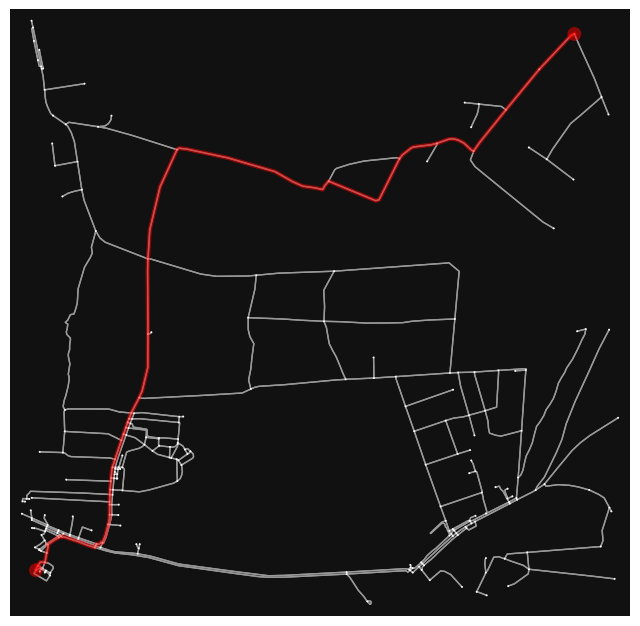

the shortest path is a distance of 3198.38 meters


In [40]:
shortest_path = findShortestPath(x,y,plot_route=True)
print("the shortest path is a distance of", round(shortest_path,2), "meters")